In [5]:
# basic libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_blobs, make_classification

In [6]:
# create a imbalanced dataset of 10K with 2 class
x,y = make_classification(n_samples=10000  # number of samples
                          ,n_features=2    # feature/label count
                          ,n_informative=2 # informative features
                          ,n_redundant=0   # redundant features
                          ,n_repeated=0    # duplicate features
                          ,n_clusters_per_class=1  # number of clusters per class; clusters during plotting
                          ,weights=[0.99]   # proportions of samples assigned to each class
                          ,flip_y=0         # fraction of samples whose class is assigned randomly. 
                          ,random_state=13 )
# club together into a dataframe
df = pd.DataFrame(x,columns=['x1','x2'])
df['y'] = y

In [8]:
# check the distribution
df['y'].value_counts()/df.shape[0]

y
0    0.99
1    0.01
Name: count, dtype: float64

<Axes: xlabel='x1', ylabel='x2'>

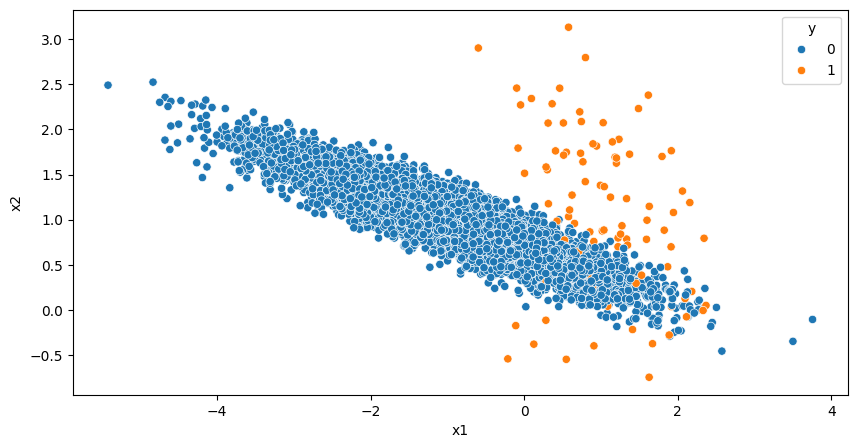

In [12]:
# scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='x1',y='x2',hue='y')

In [13]:
# import model and matrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score# split dataset into x,y

In [14]:
x = df.drop('y',axis=1)
y = df['y']# train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13)

In [16]:
# define model
lg1 = LogisticRegression(random_state=13, class_weight=None)
# fit it
lg1.fit(X_train,y_train)
# test
y_pred = lg1.predict(X_test)# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.9946666666666667
Confusion Matrix: 
[[2970    1]
 [  15   14]]
Area Under Curve: 0.7412110168409568
Recall score: 0.4827586206896552


# Weighted Logistic Regression

In [17]:
# define class weights
w = {0:1, 1:99}# define model
lg2 = LogisticRegression(random_state=13, class_weight=w)
# fit it
lg2.fit(X_train,y_train)
# test
y_pred = lg2.predict(X_test)# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.898
Confusion Matrix: 
[[2669  302]
 [   4   25]]
Area Under Curve: 0.880209844589654
Recall score: 0.8620689655172413


In [19]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0},
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0},
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0},
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100},
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0},
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1},
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005},
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150},
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500},
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }
hyperparam_grid

{'class_weight': [{0: 1000, 1: 100},
  {0: 1000, 1: 10},
  {0: 1000, 1: 1.0},
  {0: 500, 1: 1.0},
  {0: 400, 1: 1.0},
  {0: 300, 1: 1.0},
  {0: 200, 1: 1.0},
  {0: 150, 1: 1.0},
  {0: 100, 1: 1.0},
  {0: 99, 1: 1.0},
  {0: 10, 1: 1.0},
  {0: 0.01, 1: 1.0},
  {0: 0.01, 1: 10},
  {0: 0.01, 1: 100},
  {0: 0.001, 1: 1.0},
  {0: 0.005, 1: 1.0},
  {0: 1.0, 1: 1.0},
  {0: 1.0, 1: 0.1},
  {0: 10, 1: 0.1},
  {0: 100, 1: 0.1},
  {0: 10, 1: 0.01},
  {0: 1.0, 1: 0.01},
  {0: 1.0, 1: 0.001},
  {0: 1.0, 1: 0.005},
  {0: 1.0, 1: 10},
  {0: 1.0, 1: 99},
  {0: 1.0, 1: 100},
  {0: 1.0, 1: 150},
  {0: 1.0, 1: 200},
  {0: 1.0, 1: 300},
  {0: 1.0, 1: 400},
  {0: 1.0, 1: 500},
  {0: 1.0, 1: 1000},
  {0: 10, 1: 1000},
  {0: 100, 1: 1000}]}

In [21]:
# define model
lg3 = LogisticRegression(random_state=13)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="roc_auc", cv=100, n_jobs=-1, refit=True)
grid.fit(x,y)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.9639393939393939 with param: {'class_weight': {0: 0.01, 1: 1.0}}


In [22]:
# define model
lg3 = LogisticRegression(random_state=13, class_weight={0: 0.01, 1: 1.0})
# fit it
lg3.fit(X_train,y_train)
# test
y_pred = lg3.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.8863333333333333
Confusion Matrix: 
[[2633  338]
 [   3   26]]
Area Under Curve: 0.8913926577606518
Recall score: 0.896551724137931
